Business Objective
Advertisers use various online marketing channels to reach consumers, and they
typically want to know how much each channel contributes to their marketing
success. This is what is known as multi-channel attribution.

In many cases, advertisers approach this problem using simple models that help
them understand the importance of each marketing channel.

In this project, different types of models are built to help understand the channles that lead to greater customer conversion. This wil imporove the advertising ROI 
by quantifying the actual value of the multi-faceted advertising campaigns. This will enable business stakeholders
to make decisions based on the millions of converting click paths by isolating theimpact of every touchpoint.

The project aims at building multiple attribution models on the given dataset to discover channels leading to greater customer conversions.


IMPORT PACKAGES 

In [1]:
!pip install gekko
!pip install -U pandas-profiling

  Using cached gekko-1.0.6-py3-none-any.whl (12.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 3.5 MB/s eta 0:00:00
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.9/652.9 kB 8.6 MB/s eta 0:00:00a 0:00:01
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Obtaining dependency information for multimethod>=1.4 from https://files.pythonhosted.org/packages/7f/bd/750245e47e7f307d9f94d4fa84727f4ed9956005dfa671d58be1d531a0f6/multimethod-1.10-py3-none-any.whl.metadata
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=adb94c63a3815f1ac3e5857cd7b409be055bf19ebb538d5d5ad635e8396ace15
  Stored in di

In [2]:
import pandas as pd
import itertools
from collections import defaultdict
from itertools import permutations,combinations
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
from gekko import GEKKO
#from pandas_profiling import ProfileReport
from PIL import Image
import requests
import datetime as dt

## DATA IMPORTATION 

In [3]:
df = pd.read_csv('/Users/chetanhalai/Desktop/Touch-Attribution-models-and-Marketing-spend-Optimization/data/attribution_data.csv')

Sanity Check (Data Validation)

In [4]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [5]:
df.tail()

,cookie,time,interaction,conversion,conversion_value,channel
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display
586733,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:54Z,impression,0,0.0,Online Display
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14T17:17:12Z,impression,0,0.0,Paid Search


**Observation**

- Overview of the data . The first and last 5 rows look similar 

**Checking the dimensions of the data**

In [6]:
df.shape

(586737, 6)

**Observation**

- 586737 rows and 6 columns


**Checking and Verifying data types**

In [7]:
df.dtypes

cookie               object
time                 object
interaction          object
conversion            int64
conversion_value    float64
channel              object
dtype: object

**Observation**

- All the columns have the correct data types, except the 'time' which needs to be a time series 

In [8]:
df.time

0         2018-07-03T13:02:11Z
1         2018-07-17T19:15:07Z
2         2018-07-24T15:51:46Z
3         2018-07-29T07:44:51Z
4         2018-07-03T09:44:57Z
                  ...         
586732    2018-07-12T23:50:45Z
586733    2018-07-12T23:50:54Z
586734    2018-07-03T12:57:25Z
586735    2018-07-19T08:17:59Z
586736    2018-07-14T17:17:12Z
Name: time, Length: 586737, dtype: object

In [9]:
df['time'] = pd.to_datetime(df['time'])

In [10]:
df.time

0        2018-07-03 13:02:11+00:00
1        2018-07-17 19:15:07+00:00
2        2018-07-24 15:51:46+00:00
3        2018-07-29 07:44:51+00:00
4        2018-07-03 09:44:57+00:00
                    ...           
586732   2018-07-12 23:50:45+00:00
586733   2018-07-12 23:50:54+00:00
586734   2018-07-03 12:57:25+00:00
586735   2018-07-19 08:17:59+00:00
586736   2018-07-14 17:17:12+00:00
Name: time, Length: 586737, dtype: datetime64[ns, UTC]

In [11]:
df.dtypes

cookie                           object
time                datetime64[ns, UTC]
interaction                      object
conversion                        int64
conversion_value                float64
channel                          object
dtype: object

**Checking for Missing Values**


In [12]:
df.isnull().sum()

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

**Observation**
There apprears to be no missing values 

**Checking for Duplicates**

In [13]:
df.duplicated().sum()

4145

In [14]:
df[df.duplicated()]

,cookie,time,interaction,conversion,conversion_value,channel
92,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:31:54+00:00,impression,0,0.0,Online Video
94,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:32:19+00:00,impression,0,0.0,Online Video
178,0037ok3iD0h3kkEDCB0nk9iko,2018-07-11 11:54:56+00:00,impression,0,0.0,Online Video
181,0037ok3iD0h3kkEDCB0nk9iko,2018-07-11 11:55:46+00:00,impression,0,0.0,Online Video
184,0037ok3iD0h3kkEDCB0nk9iko,2018-07-11 11:55:49+00:00,impression,0,0.0,Online Video
...,...,...,...,...,...,...
585931,ooFfnA3E9k39hCCkk9A7ABiCf,2018-07-03 11:54:36+00:00,impression,0,0.0,Online Video
586037,oofEk3DkD3Bn9CA3nChFih3Ff,2018-07-20 18:45:35+00:00,impression,0,0.0,Paid Search
586127,ooh93E3D9EiCDhC7DnFEEFiA3,2018-07-10 06:50:06+00:00,impression,0,0.0,Online Video
586402,ookAiBfCiiAACCB77DhFiDAA7,2018-07-17 10:34:06+00:00,impression,0,0.0,Paid Search


In [15]:
df[df['cookie'] == '000hCBnCB7oi7ADAEnEBCnBEE']

,cookie,time,interaction,conversion,conversion_value,channel
86,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07 14:34:54+00:00,impression,0,0.0,Online Video
87,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-07 14:35:22+00:00,impression,0,0.0,Online Video
88,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-13 20:21:34+00:00,impression,0,0.0,Online Video
89,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-13 20:29:35+00:00,impression,0,0.0,Online Video
90,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-14 17:08:19+00:00,impression,0,0.0,Online Video
91,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:31:54+00:00,impression,0,0.0,Online Video
92,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:31:54+00:00,impression,0,0.0,Online Video
93,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:32:19+00:00,impression,0,0.0,Online Video
94,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:32:19+00:00,impression,0,0.0,Online Video
95,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-16 13:32:21+00:00,impression,0,0.0,Online Video


**Observation**

- Usually duplicates dont add value, however in a digital marketing context it may give us an insight into how many times an impression leads to an conversion. So i wont be dropping this data, as it provides useful insights going forward. 

**Feature Extraction** 

In [16]:
df['hour'] = df['time'].dt.hour
df['mins'] = df['time'].dt.minute
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['dayofweek'] = df['time'].dt.dayofweek
df['day_name'] = df['time'].dt.day_name()
df['month_name'] = df['time'].dt.month_name()

In [17]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel,hour,mins,day,month,year,dayofweek,day_name,month_name
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11+00:00,impression,0,0.0,Instagram,13,2,3,7,2018,1,Tuesday,July
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07+00:00,impression,0,0.0,Online Display,19,15,17,7,2018,1,Tuesday,July
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46+00:00,impression,0,0.0,Online Display,15,51,24,7,2018,1,Tuesday,July
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51+00:00,impression,0,0.0,Online Display,7,44,29,7,2018,6,Sunday,July
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57+00:00,impression,0,0.0,Paid Search,9,44,3,7,2018,1,Tuesday,July


**Observation**
New features were extracted from the time column. - giving us the ability to extract more insights from the data. 

## Univariate + Bivariate Analysis

The biavaiarta analaysis seeks to help us answere the following questions:

* What is the distribution of interaction across the 5 Channels?
* Which chanel gives us more conversion ?
* Which day give is peak conversations ?
* Is there an underlying trend on each channel ?

### What is the distribution of interaction across the 5 Channels?

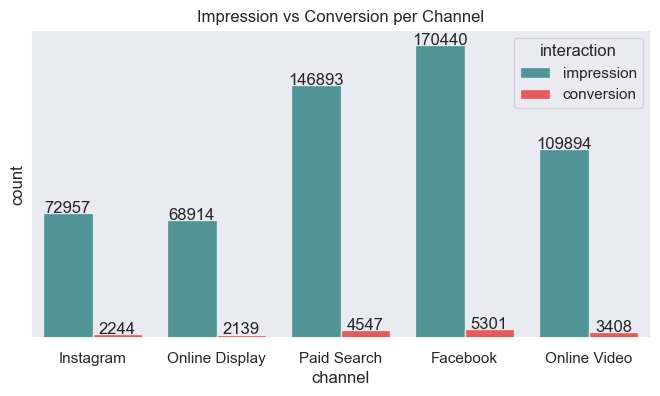

In [18]:
sns.set(rc={"figure.figsize":(8,4)})
ax = sns.countplot(data=df, hue='interaction', x='channel',palette = ['teal','red'],alpha=0.7)
ax.set(yticks=[])
ax.set(title="Impression vs Conversion per Channel") # title barplot# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = "{:.0f}".format(height), # data label, formatted to ignore decimals
 ha = "center") # sets horizontal alignment (ha) to center

**Observation**
- Across the board there were more impressions than convertion - Which is expected. 
- Facebook has he highest number of impressions and conversions, 170440 and 5301 respectively. 
- Online display had the least impression and conversion, 68914 and 2139 respectively. 

### Which chanel gives us more conversion ?

In [19]:
#  conversion per channel
channel_inter_df = df[df['interaction'] == 'conversion']\
 .groupby('channel')[['interaction']].count()\
 .reset_index()\
 .rename(columns={'interaction':'count'})\
 .sort_values(by='count')

In [20]:
channel_inter_df

,channel,count
2,Online Display,2139
1,Instagram,2244
3,Online Video,3408
4,Paid Search,4547
0,Facebook,5301


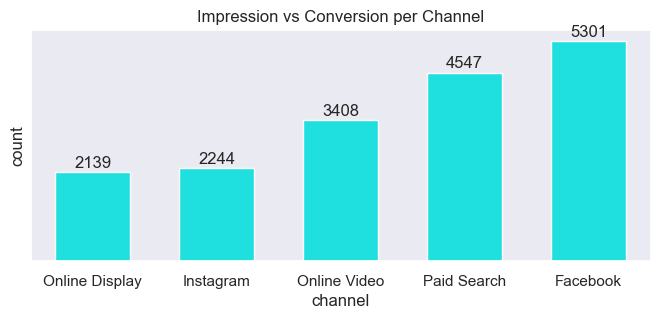

In [21]:
sns.set(rc={"figure.figsize":(8,3)})
ax = ax= sns.barplot(data=channel_inter_df, x='channel',y='count',color='cyan',width=0.6)
ax.set(yticks=[])
ax.set(title="Impression vs Conversion per Channel")
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+100, 
 s = "{:.0f}".format(height),  
 ha = "center") 

**Observation**

- From the graph above facebook had the highest conversation (5301)

#### Which day give is peak conversions ?


In [22]:
df.head()

,cookie,time,interaction,conversion,conversion_value,channel,hour,mins,day,month,year,dayofweek,day_name,month_name
0,00000FkCnDfDDf0iC97iC703B,2018-07-03 13:02:11+00:00,impression,0,0.0,Instagram,13,2,3,7,2018,1,Tuesday,July
1,00000FkCnDfDDf0iC97iC703B,2018-07-17 19:15:07+00:00,impression,0,0.0,Online Display,19,15,17,7,2018,1,Tuesday,July
2,00000FkCnDfDDf0iC97iC703B,2018-07-24 15:51:46+00:00,impression,0,0.0,Online Display,15,51,24,7,2018,1,Tuesday,July
3,00000FkCnDfDDf0iC97iC703B,2018-07-29 07:44:51+00:00,impression,0,0.0,Online Display,7,44,29,7,2018,6,Sunday,July
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03 09:44:57+00:00,impression,0,0.0,Paid Search,9,44,3,7,2018,1,Tuesday,July


In [23]:
day_inter_df = df[df['conversion'] == 1]\
 .groupby(['dayofweek','day_name'])[['interaction']].count()\
 .reset_index()\
 .rename(columns={'interaction':'count'})#\
 #.sort_values(by='count')


In [24]:
day_inter_df

,dayofweek,day_name,count
0,0,Monday,2820
1,1,Tuesday,2575
2,2,Wednesday,2645
3,3,Thursday,2397
4,4,Friday,2017
5,5,Saturday,2339
6,6,Sunday,2846


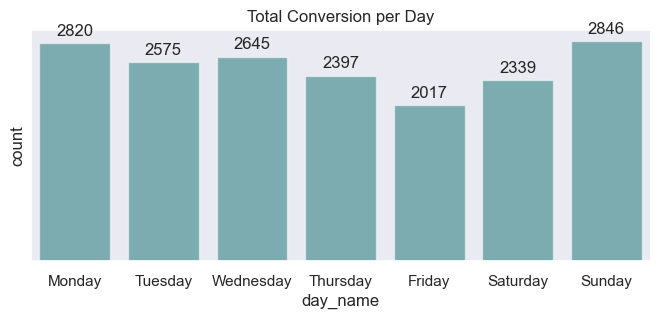

In [25]:
sns.set(rc={"figure.figsize":(8,3)})
ax = ax= sns.barplot(data=day_inter_df, x='day_name',y='count',color='teal',alpha=0.5)
ax.set(yticks=[])
ax.set(title="Total Conversion per Day")
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), 
 y = height+100, 
 s = "{:.0f}".format(height),  
 ha = "center") 

**Observation**

Sunday gives us the higest conversion 

### Is there an underlying trend on each channel ?

In [26]:
hour_inter_df = df[df['conversion'] == 1]\
 .groupby(['hour'])[['interaction']].count()\
 .reset_index()\
 .rename(columns={'interaction':'count'})

In [27]:
hour_inter_df 

,hour,count
0,0,205
1,1,86
2,2,45
3,3,30
4,4,39
5,5,149
6,6,293
7,7,662
8,8,861
9,9,1097


### Is their an underlying trend on each channel ?

In [28]:
conversion_trend_df = df[df['conversion'] == 1]\
.groupby(['hour','channel'])[['interaction']].count()\
.reset_index()\
.rename(columns={'interaction':'count'})

In [29]:
conversion_trend_df

,hour,channel,count
0,0,Facebook,78
1,0,Instagram,35
2,0,Online Display,9
3,0,Online Video,48
4,0,Paid Search,35
...,...,...,...
114,23,Facebook,146
115,23,Instagram,71
116,23,Online Display,58
117,23,Online Video,119


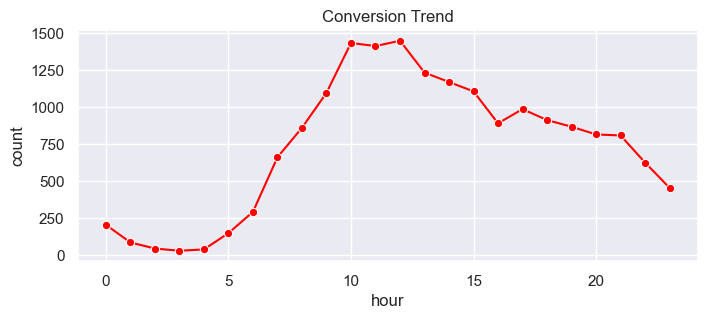

In [30]:
ax= sns.lineplot(x='hour',y='count',
             data =conversion_trend_df,
             errorbar=None,
            color='red',estimator=sum,
                marker='o')
ax.set(title = 'Conversion Trend');

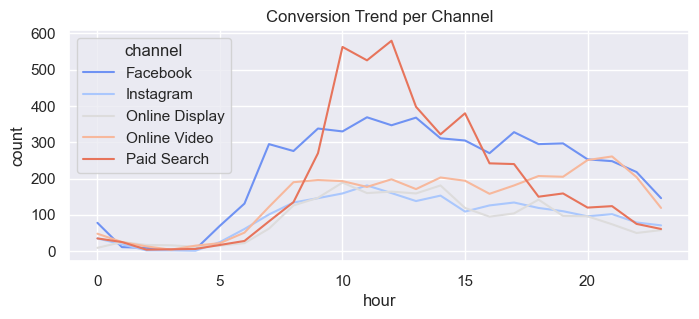

In [31]:
ax= sns.lineplot(x='hour',y='count',hue='channel',
             data =conversion_trend_df,
             errorbar=None,
            color='red',
            markers='*',estimator=sum,palette = 'coolwarm')
ax.set(title = 'Conversion Trend per Channel');


**Observation**

- Conversion peak is between 10am - 12noon 